In [65]:
#importing necessary libraries for descriptive analytics 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [66]:
#Read The Dataset

df = pd.read_csv('owid-covid-data.csv')

In [67]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [68]:
#Inida : Filter only those rows that have “India” in the “location” column and removing unnecessary variables for modelling
df = df[df['location']=='India'].drop(axis=1,columns=['iso_code','continent','location','life_expectancy','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand'])

In [69]:
df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population
13071,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09
13072,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09
13073,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09
13074,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09
13075,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09


In [64]:
df['hospital_beds_per_thousand'].unique()

array([0.53])

In [63]:
df['hospital_beds_per_thousand']

13071    0.53
13072    0.53
13073    0.53
13074    0.53
13075    0.53
         ... 
13267    0.53
13268    0.53
13269    0.53
13270    0.53
13271    0.53
Name: hospital_beds_per_thousand, Length: 201, dtype: float64

In [37]:
df.columns

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

In [29]:
x=[df[u].unique for u in df ]
x

[<bound method Series.unique of 13071    2019-12-31
 13072    2020-01-01
 13073    2020-01-02
 13074    2020-01-03
 13075    2020-01-04
             ...    
 13267    2020-07-15
 13268    2020-07-16
 13269    2020-07-17
 13270    2020-07-18
 13271    2020-07-19
 Name: date, Length: 201, dtype: object>,
 <bound method Series.unique of 13071          0.0
 13072          0.0
 13073          0.0
 13074          0.0
 13075          0.0
            ...    
 13267     936181.0
 13268     968876.0
 13269    1003832.0
 13270    1038716.0
 13271    1077618.0
 Name: total_cases, Length: 201, dtype: float64>,
 <bound method Series.unique of 13071        0.0
 13072        0.0
 13073        0.0
 13074        0.0
 13075        0.0
           ...   
 13267    29429.0
 13268    32695.0
 13269    34956.0
 13270    34884.0
 13271    38902.0
 Name: new_cases, Length: 201, dtype: float64>,
 <bound method Series.unique of 13071        0.0
 13072        0.0
 13073        0.0
 13074        0.0
 13075        0

In [70]:
df.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population
13267,2020-07-15,936181.0,29429.0,24309.0,582.0,678.390,21.325,17.615,0.422,12412664.0,320161.0,8.995,0.232,276985.0,0.201,samples tested,NaN,1.380004e+09
13268,2020-07-16,968876.0,32695.0,24915.0,606.0,702.082,23.692,18.054,0.439,12739490.0,326826.0,9.231,0.237,285523.0,0.207,samples tested,NaN,1.380004e+09
13269,2020-07-17,1003832.0,34956.0,25602.0,687.0,727.412,25.330,18.552,0.498,13072718.0,333228.0,9.473,0.241,292604.0,0.212,samples tested,NaN,1.380004e+09
13270,2020-07-18,1038716.0,34884.0,26273.0,671.0,752.690,25.278,19.038,0.486,13433742.0,361024.0,9.735,0.262,303820.0,0.220,samples tested,NaN,1.380004e+09
13271,2020-07-19,1077618.0,38902.0,26816.0,543.0,780.880,28.190,19.432,0.393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09


In [71]:
df.shape

(201, 18)

In [72]:
df.dtypes

date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
dtype: object

In [73]:
#converting Date column to ordinal 
import datetime as dt
df['date']=pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)

In [74]:
#converting tests_units to nominal 
df['tests_units'].unique()

array([nan, 'samples tested'], dtype=object)

In [75]:
df['tests_units'] = df['tests_units'].replace([np.nan,'samples tested'],[0,1]).astype('float')

In [76]:
df['tests_units'].dtypes

dtype('float64')

In [77]:
#dataset summary
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
date,201.0,7.375247e+05,5.855994e+01,7.374240e+05,7.374740e+05,7.375250e+05,7.375750e+05,7.376250e+05
total_cases,201.0,1.455656e+05,2.546444e+05,0.000000e+00,3.000000e+00,6.412000e+03,1.737630e+05,1.077618e+06
new_cases,201.0,5.361284e+03,8.563012e+03,0.000000e+00,0.000000e+00,7.730000e+02,7.964000e+03,3.890200e+04
total_deaths,201.0,4.163866e+03,7.012634e+03,0.000000e+00,0.000000e+00,1.990000e+02,4.971000e+03,2.681600e+04
new_deaths,201.0,1.334129e+02,2.212514e+02,0.000000e+00,0.000000e+00,3.100000e+01,1.950000e+02,2.003000e+03
total_cases_per_million,201.0,1.054819e+02,1.845244e+02,0.000000e+00,2.000000e-03,4.646000e+00,1.259150e+02,7.808800e+02
new_cases_per_million,201.0,3.884980e+00,6.205059e+00,0.000000e+00,0.000000e+00,5.600000e-01,5.771000e+00,2.819000e+01
total_deaths_per_million,201.0,3.017289e+00,5.081593e+00,0.000000e+00,0.000000e+00,1.440000e-01,3.602000e+00,1.943200e+01
new_deaths_per_million,201.0,9.666169e-02,1.602809e-01,0.000000e+00,0.000000e+00,2.200000e-02,1.410000e-01,1.451000e+00
total_tests,116.0,3.920807e+06,3.880958e+06,6.500000e+03,4.910618e+05,2.667677e+06,6.474094e+06,1.343374e+07


In [78]:
#data structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 13071 to 13271
Data columns (total 18 columns):
date                               201 non-null int64
total_cases                        201 non-null float64
new_cases                          201 non-null float64
total_deaths                       201 non-null float64
new_deaths                         201 non-null float64
total_cases_per_million            201 non-null float64
new_cases_per_million              201 non-null float64
total_deaths_per_million           201 non-null float64
new_deaths_per_million             201 non-null float64
total_tests                        116 non-null float64
new_tests                          110 non-null float64
total_tests_per_thousand           116 non-null float64
new_tests_per_thousand             110 non-null float64
new_tests_smoothed                 121 non-null float64
new_tests_smoothed_per_thousand    121 non-null float64
tests_units                        201 non-null flo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA65AB6EC8>,
      dtype=object)

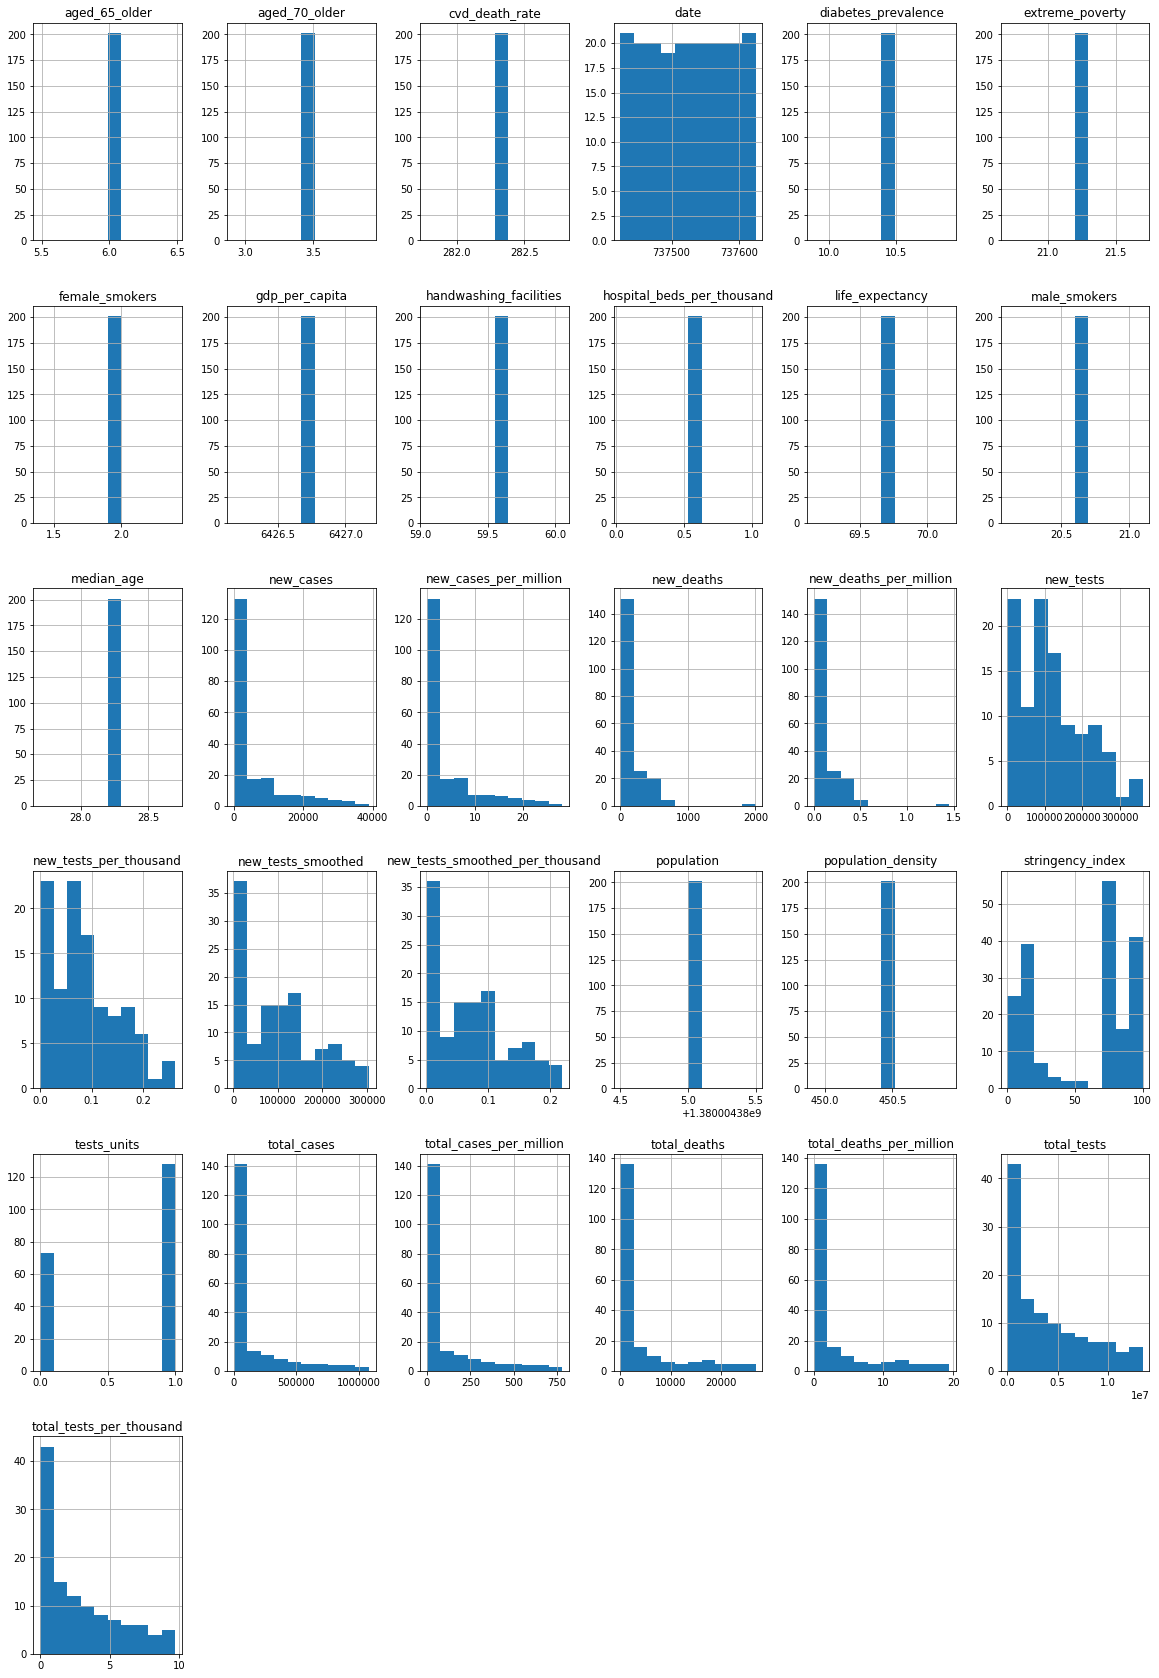

In [15]:
#statistical plots 
#Univariate Analysis:Histograms
df.hist(figsize=(20,30))

In [16]:
df.isnull().sum()

date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
total_tests                        85
new_tests                          91
total_tests_per_thousand           85
new_tests_per_thousand             91
new_tests_smoothed                 80
new_tests_smoothed_per_thousand    80
tests_units                         0
stringency_index                   10
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_poverty                     0
cvd_death_rate                      0
diabetes_prevalence                 0
female_smoke

#### on the basis of above observation we can canclude that :
##### dataset has null values for
##### total_tests :                        85
##### new_tests :                          91
##### total_tests_per_thousand :           85
##### new_tests_per_thousand :             91
##### new_tests_smoothed :                 80
##### new_tests_smoothed_per_thousand :    80
##### stringency_index:                   10

C:\Users\Spike\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Spike\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Spike\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Spike\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


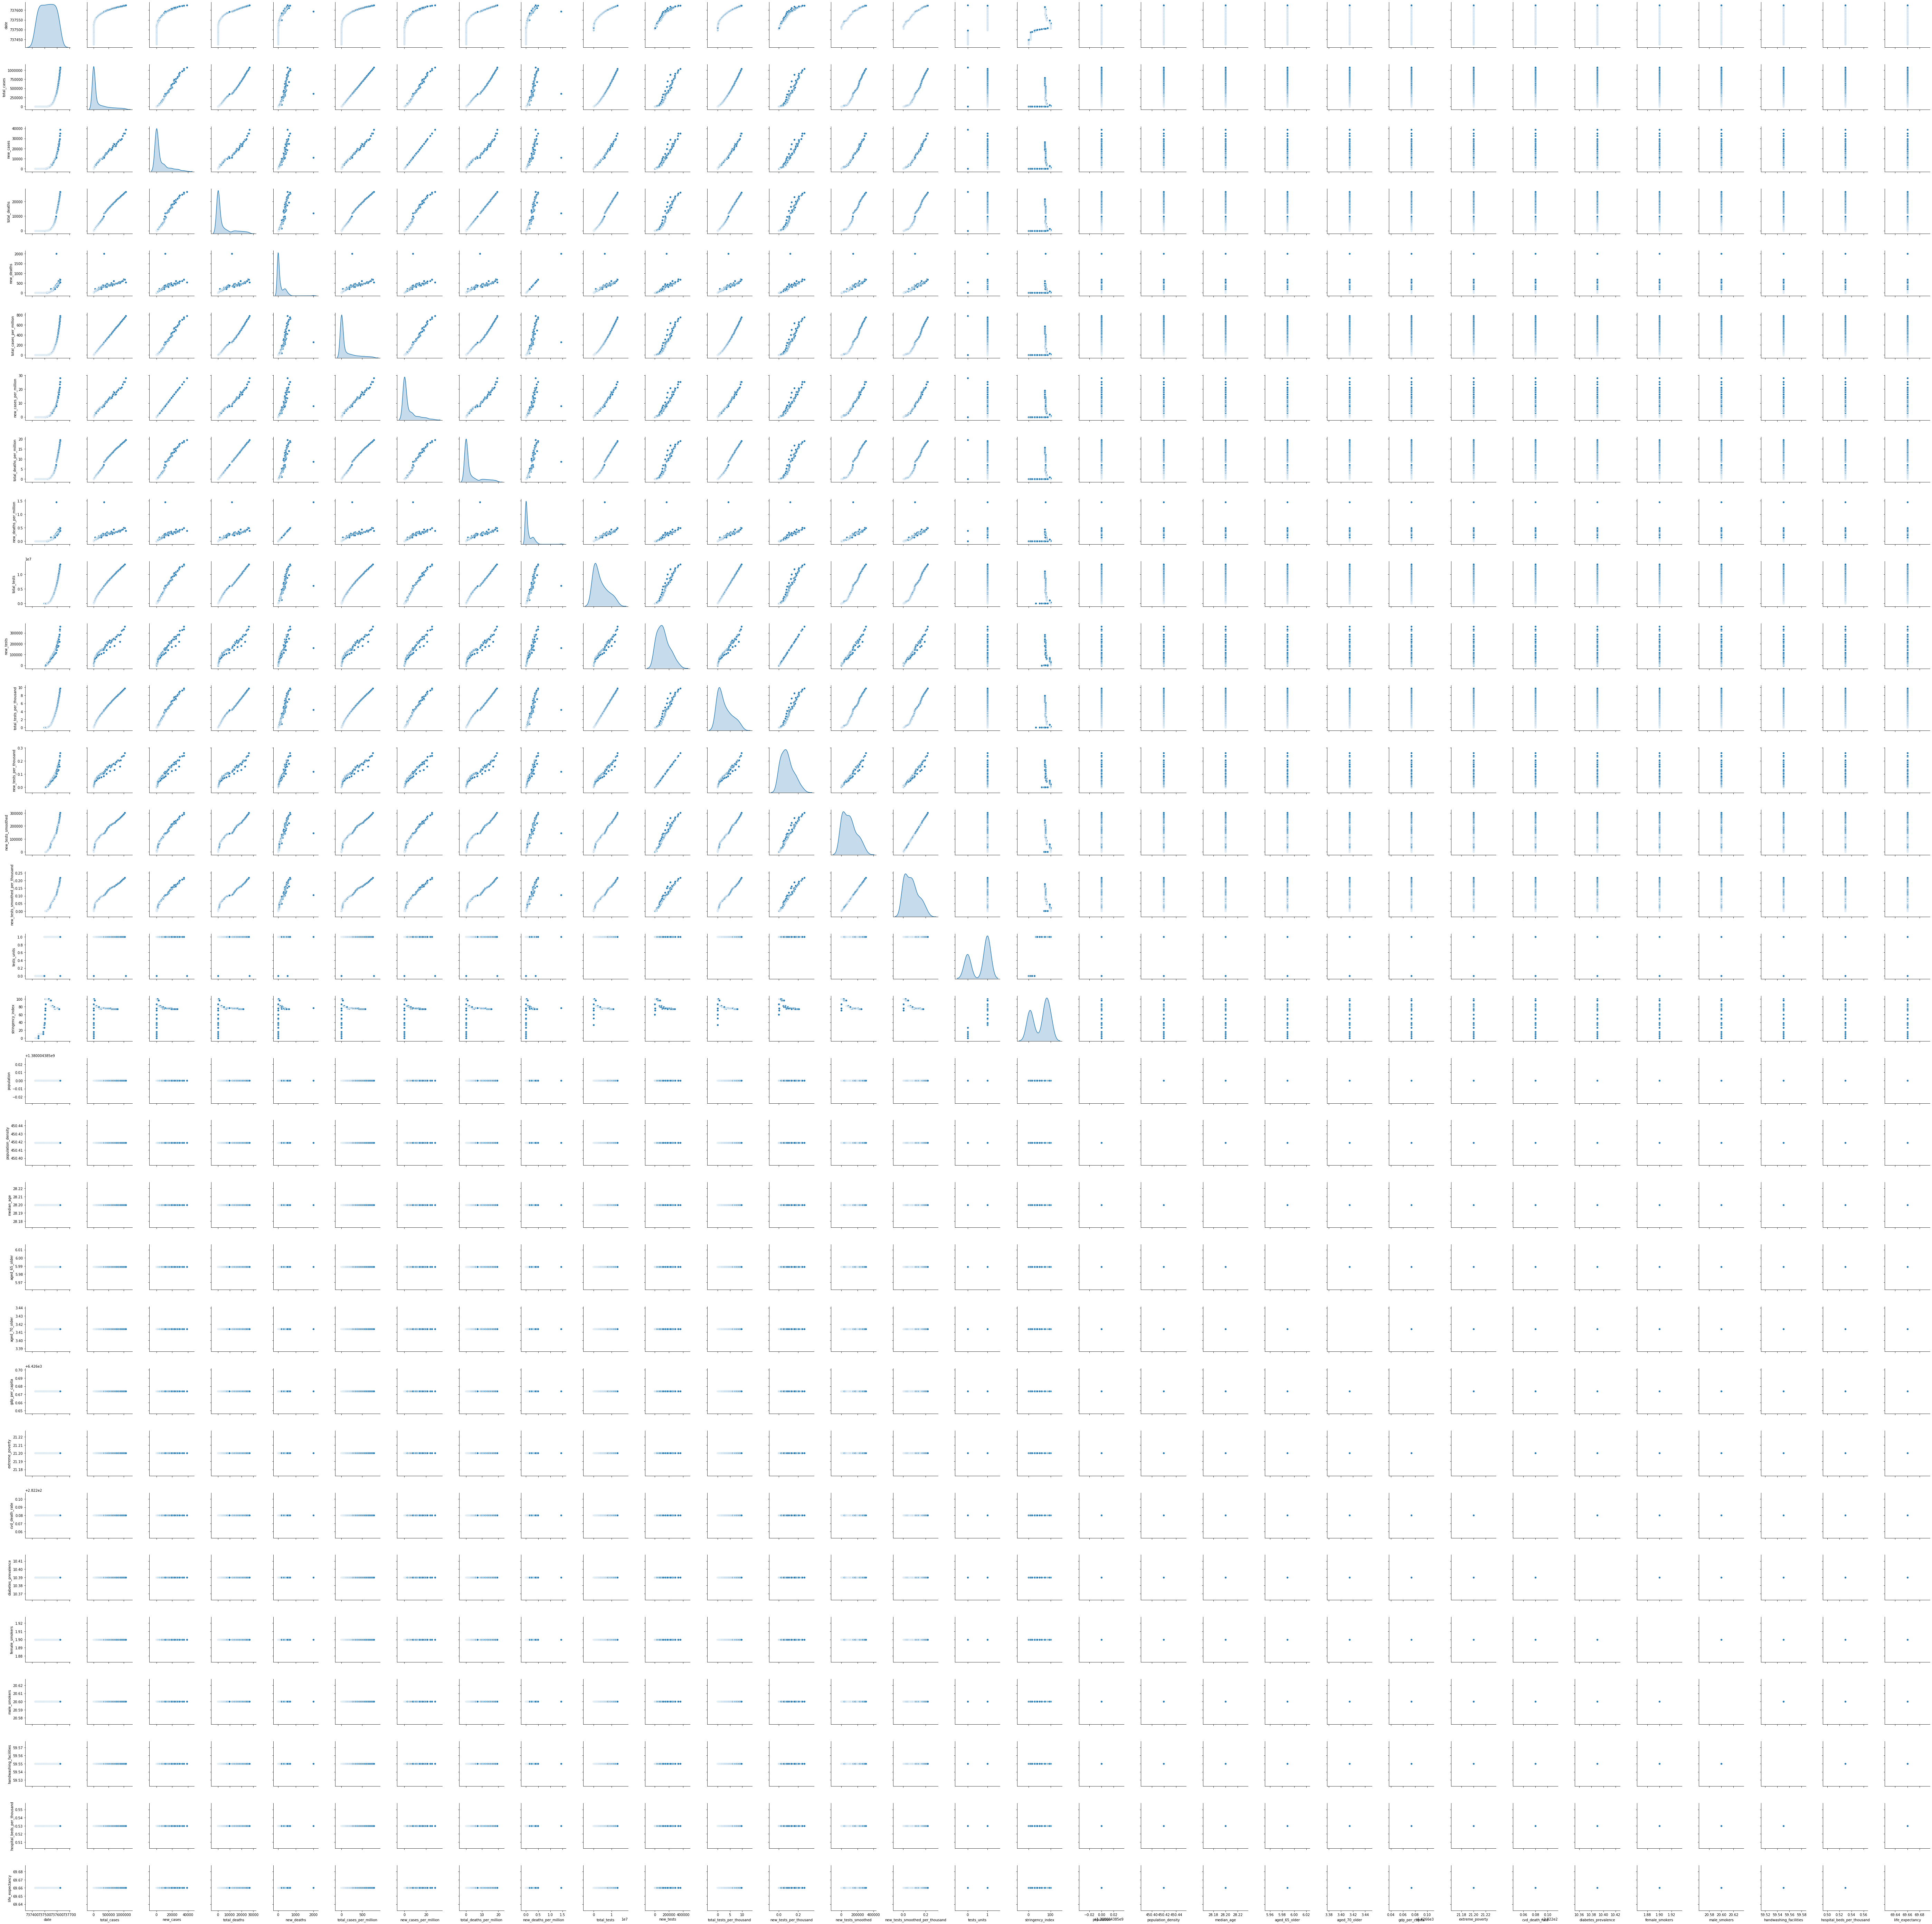

In [17]:
#statistical plots
#looking at the whole dataset graphical plots at once using pairplot 

sns.pairplot(df,diag_kind = 'kde')

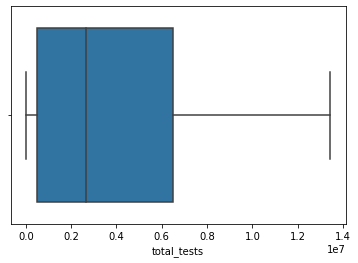

In [18]:
sns.boxplot(df['total_tests'])

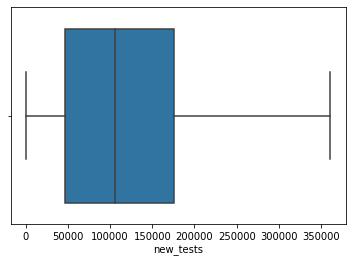

In [19]:
sns.boxplot(df['new_tests'])

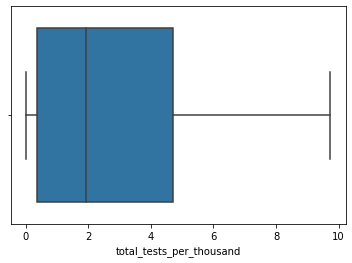

In [20]:
sns.boxplot(df['total_tests_per_thousand'])

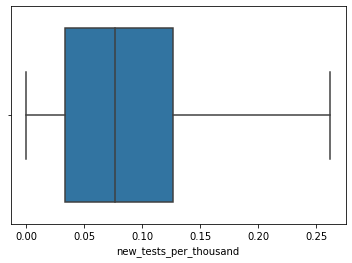

In [21]:
sns.boxplot(df['new_tests_per_thousand'])

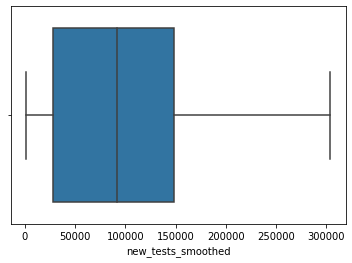

In [22]:
sns.boxplot(df['new_tests_smoothed'])

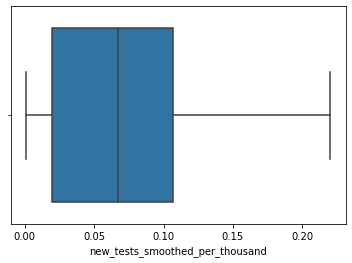

In [23]:
sns.boxplot(df['new_tests_smoothed_per_thousand'])

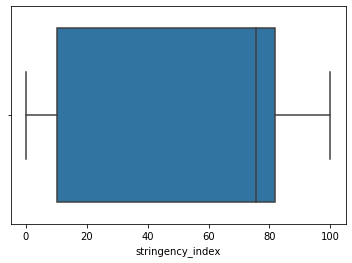

In [24]:
sns.boxplot(df['stringency_index'])

##### stringency_index <- left skewed
##### total_tests_per_thousand,total_tests <-- right skewed

In [79]:
### Handle Missing values:
# total_tests : 85
# new_tests : 91
# total_tests_per_thousand : 85
# new_tests_per_thousand : 91
# new_tests_smoothed : 80
# new_tests_smoothed_per_thousand : 80
# stringency_index: 10
df['total_tests']=df['total_tests'].fillna(df['total_tests'].median())

df['new_tests']=df['new_tests'].fillna(df['new_tests'].mean())

df['total_tests_per_thousand']=df['total_tests_per_thousand'].fillna(df['total_tests_per_thousand'].median())

df['new_tests_per_thousand']=df['new_tests_per_thousand'].fillna(df['new_tests_per_thousand'].mean())

df['new_tests_smoothed']=df['new_tests_smoothed'].fillna(df['new_tests_smoothed'].mean())

df['new_tests_smoothed_per_thousand']=df['new_tests_smoothed_per_thousand'].fillna(df['new_tests_smoothed_per_thousand'].mean())

df['stringency_index']=df['stringency_index'].fillna(df['stringency_index'].median())

In [80]:
#Setting features and target variable
#“total_cases” column as the target variable

X=df.drop(axis=1,columns='total_cases')
y=df['total_cases']

In [81]:
#Performing train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

### Linear Regression

In [82]:
#importing necessary libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LinearRegression = LinearRegression()
LinearRegression.fit(X_train,y_train)
y_pred = LinearRegression.predict(X_test)

In [83]:
LinearRegression.score(X_test,y_test)

0.9999999999980276

### Random Forest Regressor

In [84]:
#importing necessary libraries for modeling
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(X_train,y_train)
y_pred = RandomForestRegressor.predict(X_test)

C:\Users\Spike\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
RandomForestRegressor.score(X_test,y_test)

0.9987087675651362